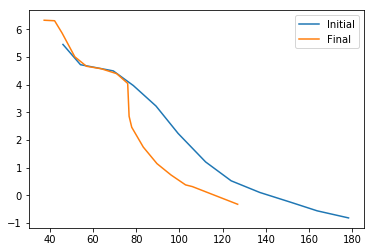

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

%matplotlib inline

# Final dune elevation
zF = 2.46

# Initial profile data
ipfn = 'MTA63080xz.dat'
data = np.genfromtxt(ipfn,delimiter=' ')
# Only keep bathy shallower than 1 m
xdata = data[data[:,1]>=-1.,0]
zdata = data[data[:,1]>=-1.,1]

# Final profile data
fpfn = 'MTA63081xz.dat'
data = np.genfromtxt(fpfn,delimiter=' ')
# Only keep bathy shallower than 1 m
xFinaldata = data[data[:,1]>=-1.,0]
zFinaldata = data[data[:,1]>=-1.,1]

plt.plot(xdata,zdata,label='Initial')
plt.plot(xFinaldata,zFinaldata,label='Final')
plt.legend()

xmax = 132.0045


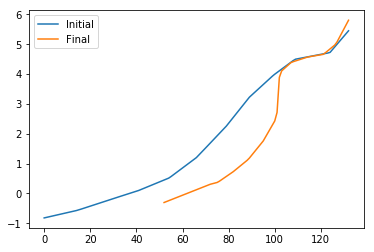

In [43]:
# interpolate to a uniform grid
xmax = max(xFinaldata[-1]-xFinaldata[0], xdata[-1]-xdata[0])
print('xmax =',xmax)
dx = 1.
xM = np.arange(0.,xmax,dx)
xx = np.max(xdata)-xdata
xxF= np.max(xdata)-xFinaldata

f = scipy.interpolate.interp1d(xx,zdata,copy=True,bounds_error=False)
z = f(xM)
fF = scipy.interpolate.interp1d(xxF,zFinaldata,copy=True,bounds_error=False)
zFinal = fF(xM)

plt.plot(xM,z,label='Initial')
plt.plot(xM,zFinal,label='Final')
plt.legend()